# Описание проекта

Необходимо подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.   
  
По заданию нам дано три дата сета:  
df_gold_recovery_train - набор данных для обучения модели    
df_gold_recovery_test - набор данных для проверки модели  
df_gold_recovery_full - общий набор данных, содержащий обучающую и тестовую выборки со всеми признаками.  

# 1. Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_gold_recovery_train = pd.read_csv('./gold_recovery_train.csv')
df_gold_recovery_test = pd.read_csv('./gold_recovery_test.csv')
df_gold_recovery_full = pd.read_csv('./gold_recovery_full.csv')

In [3]:
pd.options.display.max_columns = 90

In [4]:
df_gold_recovery_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
print('Количество значений в обучающем наборе:', df_gold_recovery_train.shape[0])
print('Количество значений в наборе для проверки:', df_gold_recovery_test.shape[0])
print('Общее количество значений в двух наборах:', df_gold_recovery_full.shape[0])

Количество значений в обучающем наборе: 16860
Количество значений в наборе для проверки: 5856
Общее количество значений в двух наборах: 22716


Посмотрим какие параметры есть в обучающем и тестовом наборе, какого они типа и сколько в них пропущенных значений.

In [6]:
columns_full = pd.DataFrame({'columns_as_index': df_gold_recovery_full.columns}, 
                            index = df_gold_recovery_full.columns)
columns_type = pd.DataFrame({'columns_type': df_gold_recovery_full.dtypes})
columns_train = pd.DataFrame({'train_columns': df_gold_recovery_train.columns}, 
                             index = df_gold_recovery_train.columns)
columns_test = pd.DataFrame({'test_columns': df_gold_recovery_test.columns}, 
                            index = df_gold_recovery_test.columns)
isna_train = pd.DataFrame({'sum_nan_train': df_gold_recovery_train.isna().sum()})
isna_test = pd.DataFrame({'sum_nan_test': df_gold_recovery_test.isna().sum()})
review_columns = columns_full.join([columns_train, columns_test, columns_type, isna_train, isna_test])
review_columns = review_columns.reset_index(drop = True)

In [7]:
pd.options.display.max_rows = 90

In [8]:
review_columns

,columns_as_index,train_columns,test_columns,columns_type,sum_nan_train,sum_nan_test
0,date,date,date,object,0,0.0
1,final.output.concentrate_ag,final.output.concentrate_ag,NaN,float64,72,NaN
2,final.output.concentrate_pb,final.output.concentrate_pb,NaN,float64,72,NaN
3,final.output.concentrate_sol,final.output.concentrate_sol,NaN,float64,370,NaN
4,final.output.concentrate_au,final.output.concentrate_au,NaN,float64,71,NaN
5,final.output.recovery,final.output.recovery,NaN,float64,1521,NaN
6,final.output.tail_ag,final.output.tail_ag,NaN,float64,66,NaN
7,final.output.tail_pb,final.output.tail_pb,NaN,float64,183,NaN
8,final.output.tail_sol,final.output.tail_sol,NaN,float64,145,NaN
9,final.output.tail_au,final.output.tail_au,NaN,float64,66,NaN


Мы видим, что в тестовом ноборе отсутствуют:  
- финальные параметры продукта;   
- параметры продукта после первичной обработки; 
- расчетные характеристики флотации;
- параметры продукта после флотации;
- параметры продукта после вторичной обработки.

В исследуемых данных, как в обучающем наборе, так и в проверочном, много пропущенных значений. Вероятно это произошло из-за того что у нас сырые данные и не все партии руды прошли полный технологический процес. На данном этапе анализа с пропущенными значениями ничего делать не будем.

Необходимо перевести параметр *date* в дату и время

In [9]:
df_gold_recovery_train['date'] = pd.to_datetime(df_gold_recovery_train['date'])
df_gold_recovery_test['date'] = pd.to_datetime(df_gold_recovery_test['date'])
df_gold_recovery_full['date'] = pd.to_datetime(df_gold_recovery_full['date'])

Проверим насколько корректные у нас исходные данные, посмотрим насколько точно рассчитана эффективность флотации (параметр *rougher.output.recovery*) в обучающей выборке. 
  
Для этого создадим функцию *recovery(data, c, f, t)*, у которой на вход подается:  
*data* - набор данных;  
*c* - доля золота в концентрате после флотации (для данного случая это параметр *rougher.output.concentrate_au*);  
*f* - доля золота в сырье до флотации (для данного случая это параметр *rougher.input.feed_au*);  
*t* - доля золота в отвальных хвостах после флотации (для данного случая это параметр *rougher.output.tail_au*).  
  
Расчет производится по формуле: recovery = ((c * (f - t)) / (f * (c - t))) * 100  

Оценивать точность будем метрикой MAE.  
  
Для получения корректных результатов удалим пустые значения в параметрах: *rougher.output.recovery*, *rougher.output.concentrate_au*, *rougher.output.tail_au*, *rougher.input.feed_au*

In [10]:
def recovery(data, c, f, t):
    c = data[c]
    f = data[f]
    t = data[t]
    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    return recovery

In [11]:
df_gold_recovery_train_dropna = df_gold_recovery_train.dropna(subset = ['rougher.output.recovery', 
                                                                        'rougher.output.concentrate_au', 
                                                                        'rougher.output.tail_au', 
                                                                        'rougher.input.feed_au'])

In [12]:
for i, row in df_gold_recovery_train_dropna.iterrows():
    df_gold_recovery_train_dropna.loc[i, 'predict_recovery'] = recovery(row, 
                                                                        'rougher.output.concentrate_au', 
                                                                        'rougher.input.feed_au', 
                                                                        'rougher.output.tail_au')

C:\Users\aivol\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aivol\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
df_gold_recovery_train_dropna[['rougher.output.recovery', 'predict_recovery']].head()

,rougher.output.recovery,predict_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
print('Средняя абсолютная ошибка между рассчитанной эффективностью флотации и значением из исходных данных равна:', 
      mean_absolute_error(df_gold_recovery_train_dropna['rougher.output.recovery'], 
                          df_gold_recovery_train_dropna['predict_recovery']))

Средняя абсолютная ошибка между рассчитанной эффективностью флотации и значением из исходных данных равна: 9.444891926100695e-15


Как видно MAE получился близок к нулю, значит исходные данные по признаку *rougher.output.recovery* представленны верно. Будем пологаться, что и по остальным признакам исходнные данные корректные.

# 2. Анализ данных

### Анализ концентрации металлов на различных этапах очистки.

Посмотрим как меняется концентрация золота, серебра и свинца на различных этапах очистки.  
На каждом этапе будем рассматривать следующие параметры: 
- концентрация веществ в смеси после флотации: *rougher.output.concentrate_au*, *rougher.output.concentrate_ag*, *rougher.output.concentrate_pb*;
- концентрация веществ в смеси после первого этапа очистки: *primary_cleaner.output.concentrate_au*, *primary_cleaner.output.concentrate_ag*, *primary_cleaner.output.concentrate_pb*;
- концентрация веществ в смеси после второго этапа очистки: *final.output.concentrate_au*, *final.output.concentrate_ag*, *final.output.concentrate_pb*.

Пропущенные значения в данных параметрах удалим, чтобы увидеть более корректный результат.

In [16]:
def plot_conc(column, metall, stage, color):
    conc = df_gold_recovery_train[column].dropna()
    mean_conc = round(conc.mean(), 2)
    conc.plot(kind='hist', bins = 40, grid=True, color=color, figsize=(20,20),
              title='Концентрация ' + metall + ' после ' + stage)
    plt.xlabel('Среднее значение концентрации ' + metall + ' на данном этапе: ' + str(mean_conc))
    plt.axvline(x=mean_conc, linestyle='--', color = 'black')

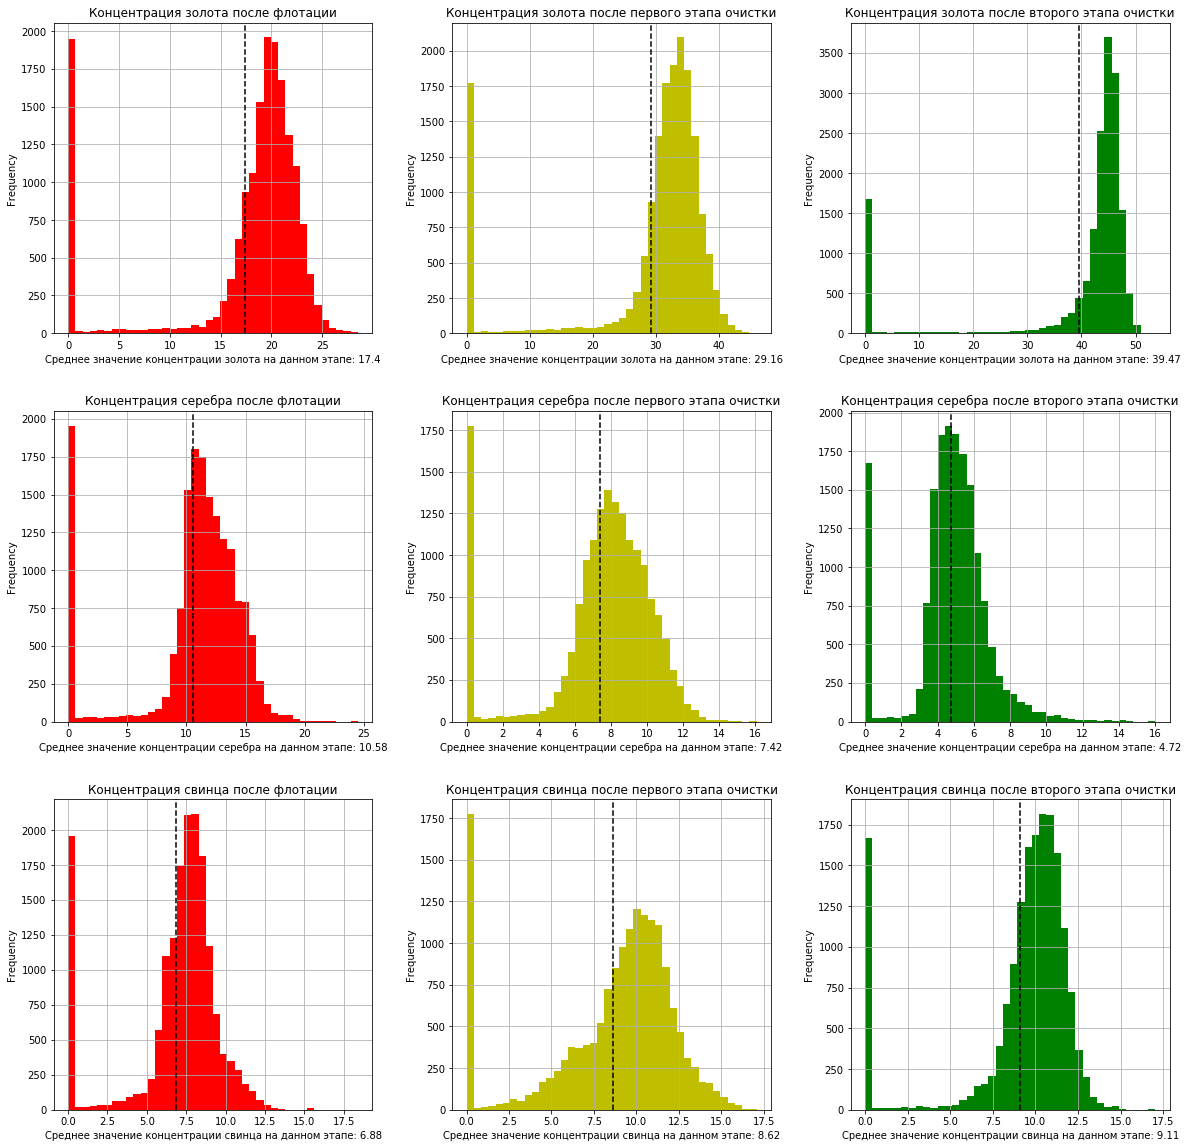

In [17]:
#Золото
plt.subplot (3, 3, 1)
plot_conc('rougher.output.concentrate_au', 'золота', 'флотации', 'r')
plt.subplot (3, 3, 2)
plot_conc('primary_cleaner.output.concentrate_au', 'золота', 'первого этапа очистки', 'y')
plt.subplot (3, 3, 3)
plot_conc('final.output.concentrate_au', 'золота', 'второго этапа очистки', 'g')

#Серебро
plt.subplot (3, 3, 4)
plot_conc('rougher.output.concentrate_ag', 'серебра', 'флотации', 'r')
plt.subplot (3, 3, 5)
plot_conc('primary_cleaner.output.concentrate_ag', 'серебра', 'первого этапа очистки', 'y')
plt.subplot (3, 3, 6)
plot_conc('final.output.concentrate_ag', 'серебра', 'второго этапа очистки', 'g')

#Свинец
plt.subplot (3, 3, 7)
plot_conc('rougher.output.concentrate_pb', 'свинца', 'флотации', 'r')
plt.subplot (3, 3, 8)
plot_conc('primary_cleaner.output.concentrate_pb', 'свинца', 'первого этапа очистки', 'y')
plt.subplot (3, 3, 9)
plot_conc('final.output.concentrate_pb', 'свинца', 'второго этапа очистки', 'g')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

Первое что бросается в глаза, это то, что у каждого параметра много нулевых значений, размер которых с каждым шагом уменьшается. Видимо это ошибка измерения обордования.  
На каждом этапе обработки сырья концентрация золота в выходной смеси увеличивается и на выходе процесса достигает в среднем 40%. Серебро и свинец не показывают таких больших показателей, а концентрация серебра, наоборот, с каждым этапом уменьшается. Это говорит нам о том, что технологический процесс имеет приоритет на выработку золота.

### Анализ размеров гранул сырья.

Сравним распределение размеров гранул сырья на обучающей и тестовой выборке. Размер гранул измерятся на двух стадиях технологичесого процесса: перед флотацией и перед первичной очисткой. Рассмотрим распределение на каждом этапе.

###### Перед флотацией.
В значениях размеров гранул перед флотацией есть немного пропущенных значений. Для сравнения распределения размеров удалим пропущенные значения.

(-24.199686085940616, 200)

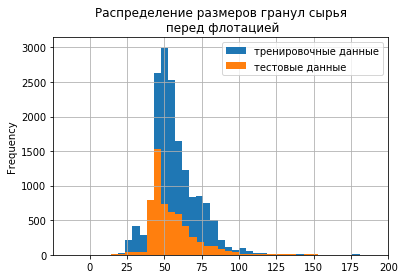

In [18]:
fsr_train = df_gold_recovery_train['rougher.input.feed_size'].dropna()
fsr_test = df_gold_recovery_test['rougher.input.feed_size'].dropna()
fsr_train.plot(kind='hist', bins = 100, grid = True, label = 'тренировочные данные')
fsr_test.plot(kind='hist', bins = 100, grid = True, label = 'тестовые данные')
plt.title('Распределение размеров гранул сырья\n перед флотацией')
plt.legend()
plt.xlim(right=200)

###### Перед первичной очисткой.

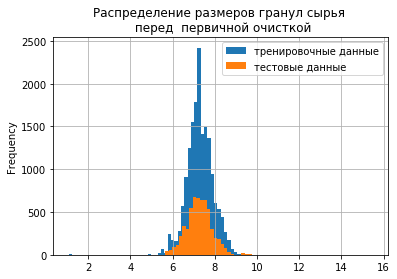

In [19]:
df_gold_recovery_train['primary_cleaner.input.feed_size'].plot(kind='hist', bins = 60, grid = True, label = 'тренировочные данные')
df_gold_recovery_test['primary_cleaner.input.feed_size'].plot(kind='hist', bins = 60, grid = True, label = 'тестовые данные')
plt.title('Распределение размеров гранул сырья \n перед  первичной очисткой')
plt.legend()

Из графиков видно, что размеры гранул сырья в тренировочных и тестовых данных на обоих этапах имеют очень похожие распределения, у них примерно одинаковая дисперсия и мода. Отсюда следует что этот параметр не помешает нам построить модель с хорошей точностью.  
Можно заметить, что перед флотацией поступает сырье с большим размером гранул с не нормальным распределением, а после процедуры флотации размеры намного уменьшились и получили нормальное распределение, значит флотационная установка дробит сырье до определенного размера.

### Анализ суммарной концентрации всех веществ на разных стадиях.

Проведем анализ суммарной концентрации всех веществ на разных стадиях. Пропущенные значения будем удалять.

In [20]:
def sum_substance(ag, pb, au, sol):
    substance = df_gold_recovery_train.dropna(subset = [ag, pb, au, sol]) 
    sum_substance = (substance[ag] + substance[pb] +
                    substance[au] + substance[sol])
    return sum_substance

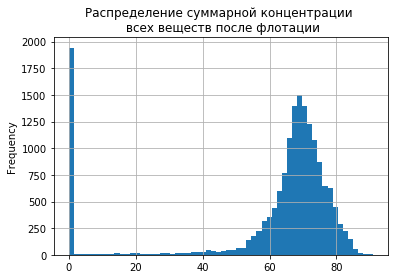

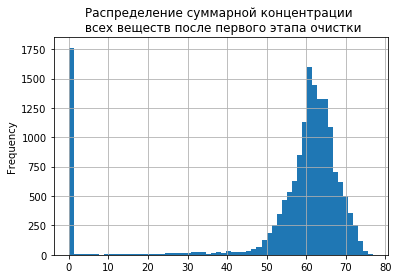

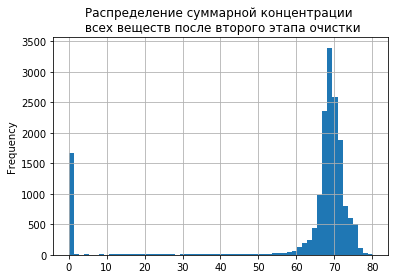

In [21]:
sum_substance_rougher = sum_substance('rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                                      'rougher.output.concentrate_au', 'rougher.output.concentrate_sol')
sum_substance_rougher.plot(kind='hist', bins = 60, grid=True, 
                           title='Распределение суммарной концентрации \n всех веществ после флотации')
plt.show()

sum_substance_primary_cleaner = sum_substance('primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                                      'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_sol')
sum_substance_primary_cleaner.plot(kind='hist', bins = 60, grid=True, 
                           title='Распределение суммарной концентрации \n всех веществ после первого этапа очистки')
plt.show()

sum_substance_final = sum_substance('final.output.concentrate_ag', 'final.output.concentrate_pb',
                                      'final.output.concentrate_au', 'final.output.concentrate_sol')
sum_substance_final.plot(kind='hist', bins = 60, grid=True, 
                           title='Распределение суммарной концентрации \n всех веществ после второго этапа очистки')
plt.show()

Графики распределения концентрации веществ наглядно показывают, насколько эффективно происходит обработка руды на втором этапе. После флотации и первичной обработки концентрация веществ имеет большую дисперсию и очень высокую высоту, по сравнению с концентраций веществ в смеси после вторичной обработки. Можно заметить, что после первого этапа мода (сейчас не берем во внимание нулевое значение) сместилась в меньшую сторону по сравнению выходом после флотации, при примерно равной высоте. Видимо это объясняется тем что на первом этапе очистки очищаются смеси с низкой концентрацией нужных нам веществ и тем самым количество смесей с концентрацией ниже околосреднего значения становится больше.  
Как уже отмечалось, очень выделяется количество смесей с нулевым значением полезных веществ. Это может быть как показатель неэффективности технологического процесса. Я предлагаю избавиться от этих значений.

In [22]:
broken_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']

In [23]:
for col in broken_columns:
    df_gold_recovery_train = df_gold_recovery_train[df_gold_recovery_train[col] > 0.01]

# 3. Модель

Для метрики модели будем использовать функцию sMAPE.  
Зададим эту функцию. В знаменателе может оказаться 0, когда предсказанное значение и фактическое будут равны 0. Чтобы избежать ошибки в расчетах можно сделать цикл. который будет перебирать каждое значение, и работать отдельно с каждым наблюдением. Или воспользоваться арифметическими операциями с таблицами и в знаменатель добавить погрешность. Т.к. второй способ быстрее чем первый, а разница в значениях не значительная, то будем использовать второй вариант расчета метрики.

In [24]:
def sMAPE(y_true, y_pred):
    n = len(y_true)
    r1 = ((abs(y_true - y_pred) * 2) / (abs(y_true) + abs(y_pred) + 1e-7)) * 100
    sMAPE = sum(r1) / n
    return sMAPE

In [25]:
from sklearn.metrics import make_scorer

In [26]:
scorer_sMAPE = make_scorer(sMAPE, greater_is_better=False)

Так как тестовые данные имеют не все признаки, которые имеют обучающие данные, то будем строить модель только по тем признакам, которые есть в тестовом наборе. Для модели, предсказывающей эффективность обогащения финального концентрата, будем использовать все признаки. Для модели, предсказывающей эффективность обогащения чернового концентрата, только те признаки, параметры которых у нас есть до флотации.  
Как мы видели ранее на гистограммах частот, признаки имеют большой уровень нулевых значений, и примерно такой же уровень средних значений (без учета нулевых). Заменим пропущенные значения средним, без учета нулевых значений. Среднее значение будем рассчитывать по обучающей выборке. Заменять пустые значения в целевых признаках мне кажется не правильным, т.к. при замене, модель будет подстраиваться под не точные значения, а это сильно исказит результат. Поэтому пропущенные значения в этих параметрах удалим.

In [27]:
columns_final = df_gold_recovery_test.columns
columns_final = columns_final[1:len(columns_final)]
columns_rougher = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 
                   'rougher.input.feed_rate', 'rougher.input.feed_size', 
                   'rougher.input.feed_sol', 'rougher.input.feed_au', 
                   'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 
                   'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate']

In [28]:
def fill_na(data, column):
    k = df_gold_recovery_train[column].median()
    data[column] = data[column].fillna(k)

In [29]:
for column in columns_final:
    fill_na(df_gold_recovery_train, column)

In [30]:
df_final = df_gold_recovery_train.dropna(subset = ['final.output.recovery'])
X_final = df_final[columns_final]
df_rougher = df_gold_recovery_train.dropna(subset = ['rougher.output.recovery'])
X_rougher = df_rougher[columns_rougher]

y_final = df_final['final.output.recovery']
y_rougher = df_rougher['rougher.output.recovery']

Так как параметры имеют разный масштаб, то проведем стандартизацию признаков.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scal_final = StandardScaler()
scal_rougher = StandardScaler()
X_final = scal_final.fit_transform(X_final)
X_rougher = scal_rougher.fit_transform(X_rougher)

In [33]:
y_final = np.array(y_final)

Рассмотрим три модели обучения: LinearRegression, Stochastic Gradient Descent, RandomForestRegressor. И выберем какая модель дает наименьшую ошибку sMAPE. Подбор параметров будем производить методом RandomizedSearch. Чтобы уменьшить расчетное время будем выполнять по 10 итераций.

#### LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
model_lr = LinearRegression()

In [36]:
score_models = pd.DataFrame(columns=['model', 'score_rougher', 'score_final'])

In [37]:
score_models.loc[0, 'model'] = 'LinearRegression'
score_models.loc[0, 'score_rougher'] = abs(cross_val_score(model_lr, X_rougher, y_rougher, 
                                                           scoring = scorer_sMAPE, cv=3).mean())
score_models.loc[0, 'score_final'] = abs(cross_val_score(model_lr, X_final, y_final, 
                                                         scoring = scorer_sMAPE, cv=3).mean())

#### Stochastic Gradient Descent

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

In [39]:
model_sgdr = SGDRegressor()

In [40]:
loss = ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty = ['l2', 'l1', 'elasticnet']
max_iter = [int(x) for x in np.linspace(1000, 10000, num = 20)]
tol = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
random_grid = {'loss': loss,
               'penalty': penalty,
               'max_iter': max_iter,
               'tol': tol}

In [41]:
rsc_sgdr = RandomizedSearchCV(estimator = model_sgdr,
                              param_distributions = random_grid,
                              n_iter = 10,
                              scoring=scorer_sMAPE,
                              cv=3,
                              random_state=4)

In [42]:
rsc_sgdr.fit(X_rougher, y_rougher)
model_sgdr_rougher = rsc_sgdr.best_estimator_
score_models.loc[1, 'model'] = 'SGDRegressor'
score_models.loc[1, 'score_rougher'] = abs(cross_val_score(model_sgdr_rougher, X_rougher, y_rougher, 
                                                           scoring = scorer_sMAPE, cv=3).mean())

C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [43]:
rsc_sgdr.fit(X_final, y_final)
model_sgdr_final = rsc_sgdr.best_estimator_
score_models.loc[1, 'score_final'] = abs(cross_val_score(model_sgdr_final, X_final, y_final, 
                                                           scoring = scorer_sMAPE, cv=3).mean())

C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


#### RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model_rfr = RandomForestRegressor()

In [46]:
n_estimators = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
max_depth.append(None)
max_features = ['auto', 'sqrt', 'log2']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features}

In [47]:
rsc_rfr = RandomizedSearchCV(estimator = model_rfr,
                              param_distributions = random_grid,
                              n_iter = 10,
                              scoring=scorer_sMAPE,
                              cv=3,
                              random_state=4)

In [48]:
rsc_rfr.fit(X_rougher, y_rougher)
model_rfr_rougher = rsc_rfr.best_estimator_
score_models.loc[2, 'model'] = 'RandomForestRegressor'
score_models.loc[2, 'score_rougher'] = abs(cross_val_score(model_sgdr_rougher, X_rougher, y_rougher, 
                                                           scoring = scorer_sMAPE, cv=3).mean())

C:\Users\aivol\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [49]:
rsc_rfr.fit(X_final, y_final)
model_rfr_final = rsc_rfr.best_estimator_
score_models.loc[2, 'score_final'] = abs(cross_val_score(model_sgdr_final, X_final, y_final, 
                                                         scoring = scorer_sMAPE, cv=3).mean())

In [50]:
score_models

,model,score_rougher,score_final
0,LinearRegression,8.07963,12.8104
1,SGDRegressor,7.7425,12.5612
2,RandomForestRegressor,7.74584,13.1331


Как видно из полученных результатов, SGDRegressor и RandomForestRegressor дают примерно одинаковые результаты. Для расчета эффективности обогащения выберем SGDRegressor.

Посчитаем эффективность обогащения для тестового набора.

In [51]:
targets_attributes = df_gold_recovery_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_gold_recovery_test = df_gold_recovery_full.merge(targets_attributes, on='date', how='left')
df_gold_recovery_test = df_gold_recovery_test.dropna(subset = ['rougher.output.recovery_y', 'final.output.recovery_y'])

In [52]:
for column in columns_final:
    fill_na(df_gold_recovery_test, column)

In [53]:
X_final_test = df_gold_recovery_test[columns_final]
X_rougher_test = df_gold_recovery_test[columns_rougher]
X_final_test = scal_final.transform(X_final_test)
X_rougher_test = scal_rougher.transform(X_rougher_test)

In [54]:
df_gold_recovery_test['predict_rougher.output.recovery'] = model_sgdr_rougher.predict(X_rougher_test)
df_gold_recovery_test['predict_final.output.recovery'] = model_sgdr_final.predict(X_final_test)

In [55]:
sMAPE_final_test = sMAPE(df_gold_recovery_test['final.output.recovery_y'], 
                         df_gold_recovery_test['predict_final.output.recovery'])
sMAPE_rougher_test = sMAPE(df_gold_recovery_test['rougher.output.recovery_y'], 
                         df_gold_recovery_test['predict_rougher.output.recovery'])
total_rougher_test = 0.25 * sMAPE_rougher_test + 0.75 * sMAPE_final_test
print('sMAPE эффективности обогащения чернового концентрата тестового набора: {:.2f}%'.format(sMAPE_rougher_test))
print('sMAPE эффективности обогащения финального концентрата тестового набора: {:.2f}%'.format(sMAPE_final_test))
print('Итоговая sMAPE тестового набора: {:.2f}%'.format(total_rougher_test))

sMAPE эффективности обогащения чернового концентрата тестового набора: 9.12%
sMAPE эффективности обогащения финального концентрата тестового набора: 9.20%
Итоговая sMAPE тестового набора: 9.18%


Сравним полученную ошибку модели с случаем, если бы мы в качестве предсказания использовали бы среднее значение эффективности.

In [56]:
mean_rougher_train = df_gold_recovery_train['rougher.output.recovery'].mean()
mean_final_train = df_gold_recovery_train['final.output.recovery'].mean()
print('Средняя эффективность обогащения чернового концентрата тренировочного набора: {:.2f}%'.format(mean_rougher_train))
print('Средняя эффективность обогащения финального концентрата тренировочного набора: {:.2f}%'.format(mean_final_train))

Средняя эффективность обогащения чернового концентрата тренировочного набора: 84.80%
Средняя эффективность обогащения финального концентрата тренировочного набора: 67.29%


In [57]:
df_gold_recovery_test['mean_rougher_train'] = mean_rougher_train
df_gold_recovery_test['mean_final_train'] = mean_final_train

In [58]:
sMAPE_mean_final_test = sMAPE(df_gold_recovery_test['final.output.recovery_y'], 
                         df_gold_recovery_test['mean_final_train'])
sMAPE_mean_rougher_test = sMAPE(df_gold_recovery_test['rougher.output.recovery_y'], 
                         df_gold_recovery_test['mean_rougher_train'])
total_mean_test = 0.25 * sMAPE_mean_rougher_test + 0.75 * sMAPE_mean_final_test
print('sMAPE эффективности обогащения чернового концентрата тестового набора при выборе среднего значения: {:.2f}%'.format(sMAPE_mean_rougher_test))
print('sMAPE эффективности обогащения финального концентрата тестового набора при выборе среднего значения: {:.2f}%'.format(sMAPE_mean_final_test))
print('Итоговая sMAPE тестового набора при выборе среднего значения: {:.2f}%'.format(total_mean_test))

sMAPE эффективности обогащения чернового концентрата тестового набора при выборе среднего значения: 10.70%
sMAPE эффективности обогащения финального концентрата тестового набора при выборе среднего значения: 10.71%
Итоговая sMAPE тестового набора при выборе среднего значения: 10.71%


При использовании константной модели получили ошибку sMAPE 10.7%.  
Получилось, что наша модель в среднем почти на 1.6% лучше предсказывает эффективность чем константная модель. Это конечно хорошо, но разница не сильно велика.

# 4. Вывод.

Перед нами стояла задача подготовить прототип модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды. У нас имеется тренировочный набор данных для обучения модели и тестовый набор для проверки выбранной модели.  
В начале мы провели анализ данных. Увидели, что в тестовом наборе отсутствуют:  
- финальные параметры продукта;   
- параметры продукта после первичной обработки; 
- расчетные характеристики флотации;
- параметры продукта после флотации;
- параметры продукта после вторичной обработки.  
  
Так же исследуемых данных, как в обучающем наборе, так и в тестовом, много пропущенных значений. ВВидимо это ошибка измерения обордования.  
Мы проверили правильность рассчитанной эффективности обогащения *rougher.output.recovery* в обучающем наборе данных. Средняя абсолютная ошибка между рассчитанной эффективностью флотации и значением из исходных данных получился близок к нулю, значит исходные данные по признаку *rougher.output.recovery* представлены верно.  
Затем мы провели ряд анализов:  
- **Анализ концентрации металлов на различных этапах очистки.**  
Обнаружили, что у каждого параметра много нулевых значений, размер которых с каждым шагом уменьшается. Видимо технологический процесс не настолько хорош, чтобы отыскать в каждой смеси нужные металлы, или просто в этих смесях не было нужных металлов.  
На каждом этапе обработки сырья концентрация золота в выходной смеси увеличивается и на выходе процесса достигает в среднем 40%. Серебро и свинец не показывают таких больших показателей, а концентрация серебра, наоборот, с каждым этапом уменьшается. Это говорит нам о том, что технологический процесс имеет приоритет на выработку золота.  
- **Анализ размеров гранул сырья.**  
Размеры гранул сырья в тренировочных и тестовых данных на обоих этапах имеют очень похожие распределения, у них примерно одинаковая дисперсия и мода. Отсюда следует что этот параметр не помешает нам построить модель с хорошей точностью.  
Можно заметить, что перед флотацией поступает сырье с большим размером гранул с не нормальным распределением, а после процедуры флотации размеры намного уменьшились и получили нормальное распределение, значит флотационная установка дробит сырье до определенного размера.
- **Анализ суммарной концентрации всех веществ на разных стадиях.**  
Графики распределения концентрации веществ наглядно показали, насколько эффективно происходит обработка руды на втором этапе. После флотации и первичной обработки концентрация веществ имеет большую дисперсию и очень высокую высоту, по сравнению с концентраций веществ в смеси после вторичной обработки. Можно заметить, что после первого этапа мода (сейчас не берем во внимание нулевое значение) сместилась в меньшую сторону по сравнению выходом после флотации, при примерно равной высоте. Видимо это объясняется тем что на первом этапе очистки очищаются смеси с низкой концентрацией нужных нам веществ и тем самым количество смесей с концентрацией ниже около среднего значения становится больше. Как уже отмечалось, очень выделяется количество смесей с нулевым значением полезных веществ. Я предлагаю удалить эти данные.  
  
**Построение модели.**  
В заключительно части, мы перешли к построению моделей. Так как тестовые данные имеют не все признаки, которые имеют обучающие данные, то мы строили модель только по тем признакам, которые есть в тестовом наборе. Для модели, предсказывающей эффективность обогащения финального концентрата, использовали все признаки. Для модели, предсказывающей эффективность обогащения чернового концентрата, только те признаки, параметры которых у нас есть до флотации.  
Как мы видели ранее на гистограммах частот, признаки имеют большой уровень нулевых значений, и примерно такой же уровень средних значений (без учета нулевых). Мы заменили пропущенные значения средним, без учета нулевых значений. Среднее рассчитали по обучающей выборке. Пустые значения в целевых признаках удалили.  
Так как параметры имеют разный масштаб, то провели стандартизацию признаков.  
Рассмотрели три модели обучения: LinearRegression, Stochastic Gradient Descent, RandomForestRegressor.  
Результаты эффективности предсказания обогащения чернового концентрата *rougher* и обогащения финального концентрата *final* по метрике sMAPE представлены в таблице:

In [59]:
score_models

,model,score_rougher,score_final
0,LinearRegression,8.07963,12.8104
1,SGDRegressor,7.7425,12.5612
2,RandomForestRegressor,7.74584,13.1331


SGDRegressor и RandomForestRegressor имеют примерно одинаковые результаты. Для расчета эффективности обогащения выбрали SGDRegressor.  
На тестовом наборе получили следующие параметры:

In [60]:
print('sMAPE эффективности обогащения чернового концентрата тестового набора: {:.2f}%'.format(sMAPE_rougher_test))
print('sMAPE эффективности обогащения финального концентрата тестового набора: {:.2f}%'.format(sMAPE_final_test))
print('Итоговая sMAPE тестового набора: {:.2f}%'.format(total_rougher_test))

sMAPE эффективности обогащения чернового концентрата тестового набора: 9.12%
sMAPE эффективности обогащения финального концентрата тестового набора: 9.20%
Итоговая sMAPE тестового набора: 9.18%


При сравнении нашей модели с константной получилось, что наша модель в среднем почти на 1.5% лучше предсказывает эффективность чем константная модель.

In [61]:
print('sMAPE эффективности обогащения чернового концентрата тестового набора при использовании константной модели: {:.2f}%'.format(sMAPE_mean_rougher_test))
print('sMAPE эффективности обогащения финального концентрата тестового набора при использовании константной модели: {:.2f}%'.format(sMAPE_mean_final_test))
print('Итоговая sMAPE тестового набора при выборе среднего значения: {:.2f}%'.format(total_mean_test))

sMAPE эффективности обогащения чернового концентрата тестового набора при использовании константной модели: 10.70%
sMAPE эффективности обогащения финального концентрата тестового набора при использовании константной модели: 10.71%
Итоговая sMAPE тестового набора при выборе среднего значения: 10.71%
